### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

### Loading the data

In [3]:
data = pd.read_csv('msft_stock_data.csv')
data.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-01 00:00:00+00:00,106.73121643066406,112.52999877929688,113.0199966430664,111.66999816894531,112.88999938964844,23501200
3,2019-03-04 00:00:00+00:00,106.47510528564453,112.26000213623047,113.25,110.80000305175781,113.0199966430664,26608000
4,2019-03-05 00:00:00+00:00,105.9439697265625,111.69999694824219,112.38999938964844,111.2300033569336,112.25,19538300
5,2019-03-06 00:00:00+00:00,105.99140930175781,111.75,112.66000366210938,111.43000030517578,111.87000274658203,17687000
6,2019-03-07 00:00:00+00:00,104.70147705078125,110.38999938964844,111.55000305175781,109.87000274658203,111.4000015258789,25339000
7,2019-03-08 00:00:00+00:00,104.8152847290039,110.51000213623047,110.70999908447266,108.80000305175781,109.16000366210938,22818400
8,2019-03-11 00:00:00+00:00,107.0157470703125,112.83000183105469,112.94999694824219,110.9800033569336,110.98999786376953,26491600
9,2019-03-12 00:00:00+00:00,107.76502990722656,113.62000274658203,113.98999786376953,112.6500015258789,112.81999969482422,26132700


### Cleaning the 'close' column

In [4]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data.dropna(subset=['Close'], inplace=True)

### Plotting the closing price

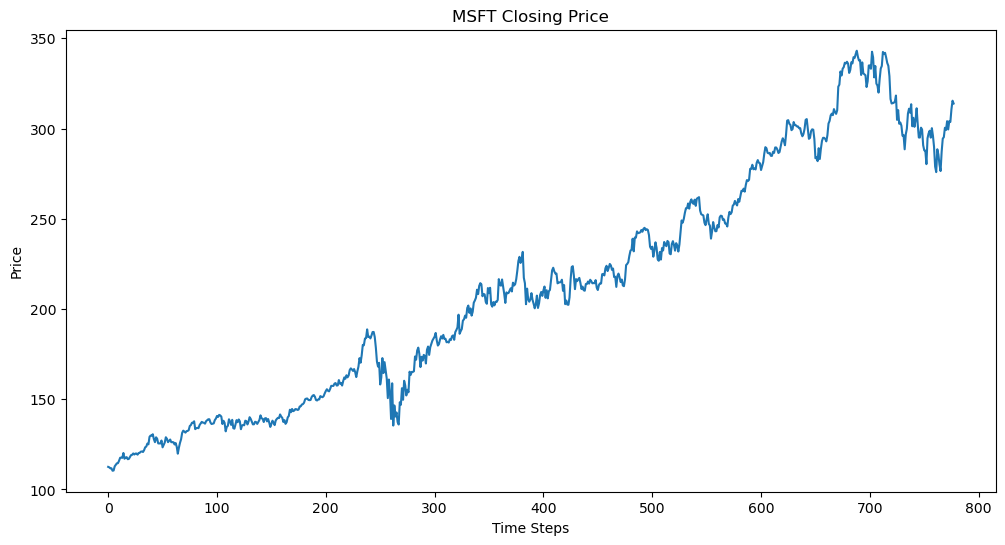

In [5]:
# Reset the index if necessary
data.reset_index(drop=True, inplace=True)

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('MSFT Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.show()


### Prediction

In [6]:
# Prepare the data for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

### LSTM Model

In [7]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' in features
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.1605 - val_loss: 0.0164
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0092 - val_loss: 0.0017
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014 - val_loss: 9.5562e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0011 - val_loss: 9.4264e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0011 - val_loss: 9.4097e-04
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0011 - val_loss: 9.1607e-04
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0011 - val_loss: 9.9637e-04
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0013 - val_loss: 9.6425e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0011 - val_loss: 9.0650e-04
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━

### CNN model 

In [8]:
# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50


C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0678 - val_loss: 0.0035
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5731e-04 - val_loss: 0.

### Calculations

In [9]:
# Evaluate models
lstm_loss = lstm_model.evaluate(X_test, y_test)
cnn_loss = cnn_model.evaluate(X_test, y_test)

print(f'LSTM Model Loss: {lstm_loss}')
print(f'CNN Model Loss: {cnn_loss}')

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
cnn_predictions = cnn_model.predict(X_test)

# Inverse transform the predictions
y_test_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]
lstm_predictions_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], lstm_predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
cnn_predictions_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], cnn_predictions, X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate and print Mean Absolute Error and Root Mean Squared Error
lstm_mae = mean_absolute_error(y_test_inverse, lstm_predictions_inverse)
cnn_mae = mean_absolute_error(y_test_inverse, cnn_predictions_inverse)
lstm_rmse = np.sqrt(mean_squared_error(y_test_inverse, lstm_predictions_inverse))
cnn_rmse = np.sqrt(mean_squared_error(y_test_inverse, cnn_predictions_inverse))

print(f'LSTM Mean Absolute Error: ${lstm_mae:.2f}')
print(f'CNN Mean Absolute Error: ${cnn_mae:.2f}')
print(f'LSTM Root Mean Squared Error: ${lstm_rmse:.2f}')
print(f'CNN Root Mean Squared Error: ${cnn_rmse:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.7886e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0511e-04
LSTM Model Loss: 0.0008273447747342288
CNN Model Loss: 0.0008482878911308944
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
LSTM Mean Absolute Error: $5.04
CNN Mean Absolute Error: $5.22
LSTM Root Mean Squared Error: $6.69
CNN Root Mean Squared Error: $6.78


### Visualization of prediction

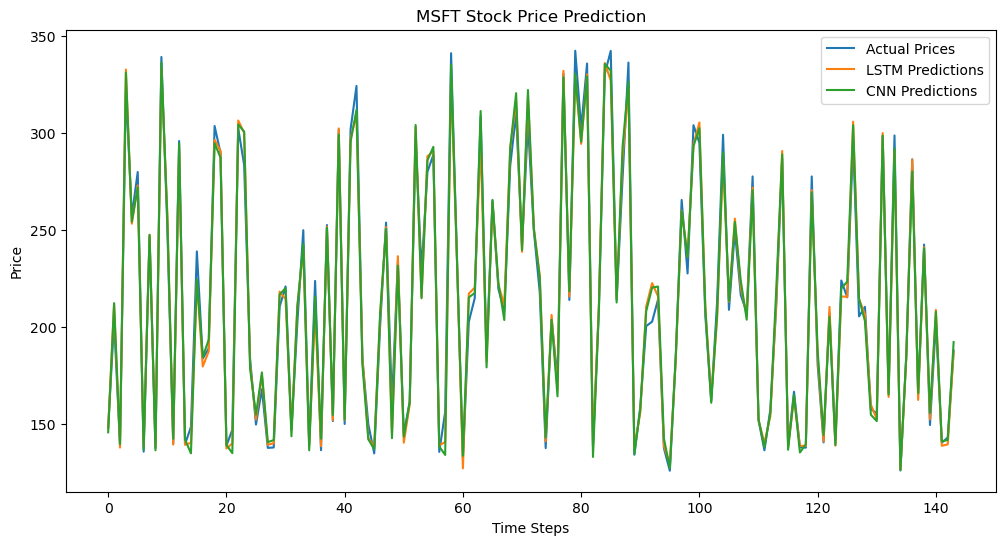

In [10]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Prices')
plt.plot(lstm_predictions_inverse, label='LSTM Predictions')
plt.plot(cnn_predictions_inverse, label='CNN Predictions')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()